### Data Loading

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, tensorflow as tf

In [13]:
train=pd.read_csv('C:/Users/jituk/Desktop/fashionmnist/fashion-mnist_train.csv')
test=pd.read_csv('C:/Users/jituk/Desktop/fashionmnist/fashion-mnist_test.csv')

In [15]:
train.shape

(60000, 785)

In [16]:
test.shape

(10000, 785)

In [17]:
train.shape[0]

60000

In [21]:
x_train = train.drop(['label'], axis=1).values.astype('float32')
x_train = x_train.reshape(x_train.shape[0], 28, 28)

In [24]:
train['label'].value_counts(normalize=True)

9    0.1
8    0.1
7    0.1
6    0.1
5    0.1
4    0.1
3    0.1
2    0.1
1    0.1
0    0.1
Name: label, dtype: float64

In [25]:
train['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

### Data Preprocessing

In [26]:
from tensorflow.python.keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# Transform Train and Test into images\labels.
x_train = train.drop(['label'], axis=1).values.astype('float32') # all pixel values
y_train = train['label'].values.astype('int32') # only labels i.e targets digits
x_test = test.drop(['label'], axis=1).values.astype('float32')
x_train = x_train.reshape(x_train.shape[0], 28, 28) / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28) / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.20, random_state=0)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(x_test.shape)

(53400, 28, 28)
(6600, 28, 28)
(53400,)
(10000, 28, 28)


In [28]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(x_train.shape)
num_classes = len(classes)
samples_per_class = 7
plt.figure(0)

(53400, 28, 28)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

#####  Visualize Sample Data of Each Class

In [ ]:
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y) #returns indices of array values where the condition holds true
    idxs = np.random.choice(idxs, samples_per_class, replace=False) #randomly chooses 'samples_per_class' number of values from 'idxs'
    #print(idxs)
    #print('---------------------------')
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        # plt.imshow(x_train[idx].astype('uint8'))
        plt.imshow(x_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [42]:
np.random.choice([1,2,3,4,5], 3, replace=False)

array([5, 2, 4])

##### Converting arrays to 4D 

In [44]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)  
x_val = x_val.reshape(x_val.shape[0], 28, 28,1)  
x_test = x_test.reshape(x_test.shape[0], 28, 28,1) 
print("Train size:{}\nvalidation size:{}\nTest size:{}".format(x_train.shape,x_val.shape, x_test.shape))

mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

Train size:(53400, 28, 28, 1)
validation size:(6600, 28, 28, 1)
Test size:(10000, 28, 28, 1)


### Model Building

In [61]:
from tensorflow.python.keras.layers import Input , Dense , Conv2D , Activation , Add,ReLU,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.python.keras.models import Model

input = Input(shape=[28, 28, 1])
x = Conv2D(32, (3, 3), strides=1, padding='same')(input)
# x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform')(x)
x = Activation('relu')(x)

x = Conv2D(32, (3, 3), strides=1, padding='same')(x)
x = Activation('relu')(x)

#x = MaxPool2D(pool_size=(2,2), strides=1, padding='same')(x)
#x = Dropout (0.4)(x)

x = Conv2D(32, (3, 3), strides=1, padding='same')(x)
x = Activation('relu')(x)

#x = Conv2D(64, (3, 3), strides=1, padding='same')(x)
#x = Activation('relu')(x)

#x = Conv2D(64, (3, 3), strides=1, padding='same')(x)
#x = Activation('relu')(x)

x = MaxPool2D(pool_size=(2,2), strides=1, padding='same')(x)

x = Flatten()(x)

x = Dense(128)(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout (0.4)(x)

x = Dense(10)(x)
x = Activation('softmax')(x)

model = Model(inputs = input, outputs =x)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_19 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_21 (Activation)   (None, 28, 28, 32)        0         
__________

In [62]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.python.keras.optimizers import Adam ,RMSprop

epochs = 50
Learning_rate = 0.001
decay= 5 * Learning_rate / epochs
optimizer = RMSprop(lr=Learning_rate, rho=0.9, epsilon=1e-08, decay= 0)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00005)

aug_num = 10 
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range= 0.8, 
        zoom_range = aug_num / 100, 
        width_shift_range= aug_num / 100,  
        height_shift_range= aug_num / 100,  
        horizontal_flip=0.05,  
        vertical_flip=False)


datagen.fit(x_train)
batch_size = 256
checkpoint = ModelCheckpoint("best_weights.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
model.load_weights("best_weights.hdf5") 

Epoch 1/50
6600/6600 [==============================] - 2s 277us/sample - loss: 0.5618 - acc: 0.8064

Epoch 00001: val_acc improved from -inf to 0.80636, saving model to best_weights.hdf5
209/209 [==============================] - 39s 185ms/step - loss: 0.6621 - acc: 0.7623 - val_loss: 0.5622 - val_acc: 0.8064
Epoch 2/50
6600/6600 [==============================] - 2s 238us/sample - loss: 0.3469 - acc: 0.8708s - loss: 0.3411 - 

Epoch 00002: val_acc improved from 0.80636 to 0.87076, saving model to best_weights.hdf5
209/209 [==============================] - 37s 176ms/step - loss: 0.4636 - acc: 0.8316 - val_loss: 0.3475 - val_acc: 0.8708
Epoch 3/50
6600/6600 [==============================] - 2s 239us/sample - loss: 0.3136 - acc: 0.8839

Epoch 00003: val_acc improved from 0.87076 to 0.88394, saving model to best_weights.hdf5
209/209 [==============================] - 37s 176ms/step - loss: 0.4088 - acc: 0.8521 - val_loss: 0.3140 - val_acc: 0.8839
Epoch 4/50
6600/6600 [=================

6600/6600 [==============================] - 2s 240us/sample - loss: 0.2073 - acc: 0.9244

Epoch 00027: val_acc did not improve from 0.92561
209/209 [==============================] - 37s 175ms/step - loss: 0.2370 - acc: 0.9136 - val_loss: 0.2071 - val_acc: 0.9244
Epoch 28/50
6600/6600 [==============================] - 2s 239us/sample - loss: 0.2113 - acc: 0.9235s - loss: 0.20

Epoch 00028: val_acc did not improve from 0.92561
209/209 [==============================] - 37s 175ms/step - loss: 0.2341 - acc: 0.9161 - val_loss: 0.2112 - val_acc: 0.9235
Epoch 29/50
6600/6600 [==============================] - 2s 240us/sample - loss: 0.2062 - acc: 0.9253

Epoch 00029: val_acc did not improve from 0.92561

Epoch 00029: ReduceLROnPlateau reducing learning rate to 5e-05.
209/209 [==============================] - 37s 175ms/step - loss: 0.2335 - acc: 0.9166 - val_loss: 0.2061 - val_acc: 0.9253
Epoch 30/50
6600/6600 [==============================] - 2s 242us/sample - loss: 0.2109 - acc: 0.9236


### (Train vs Validation) Loss and Accuracy

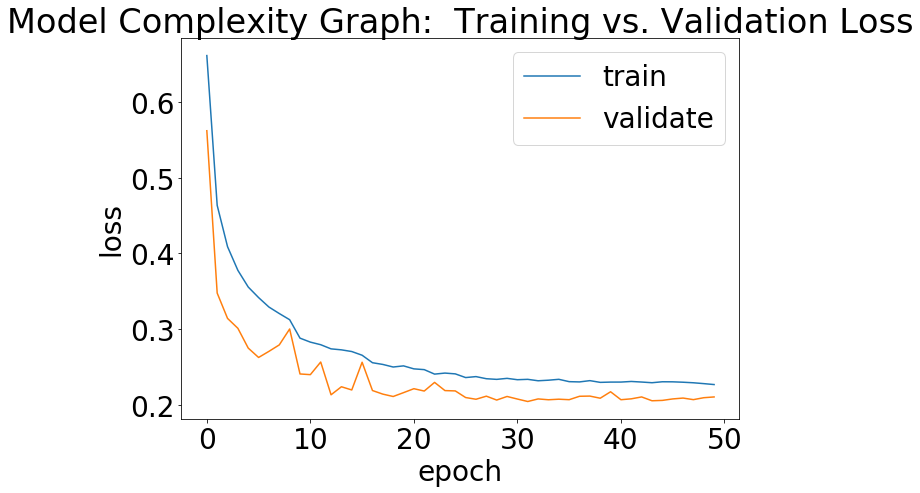

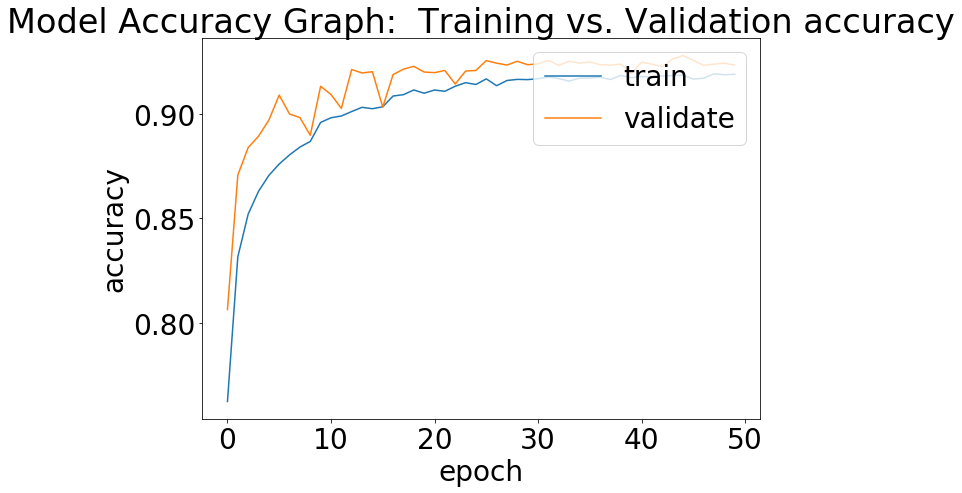

In [65]:
plt.figure(1,figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')

plt.figure(2,figsize=(10,7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

##### Confusion Matrix

In [66]:
y_test = test['label'].values.astype('int32')

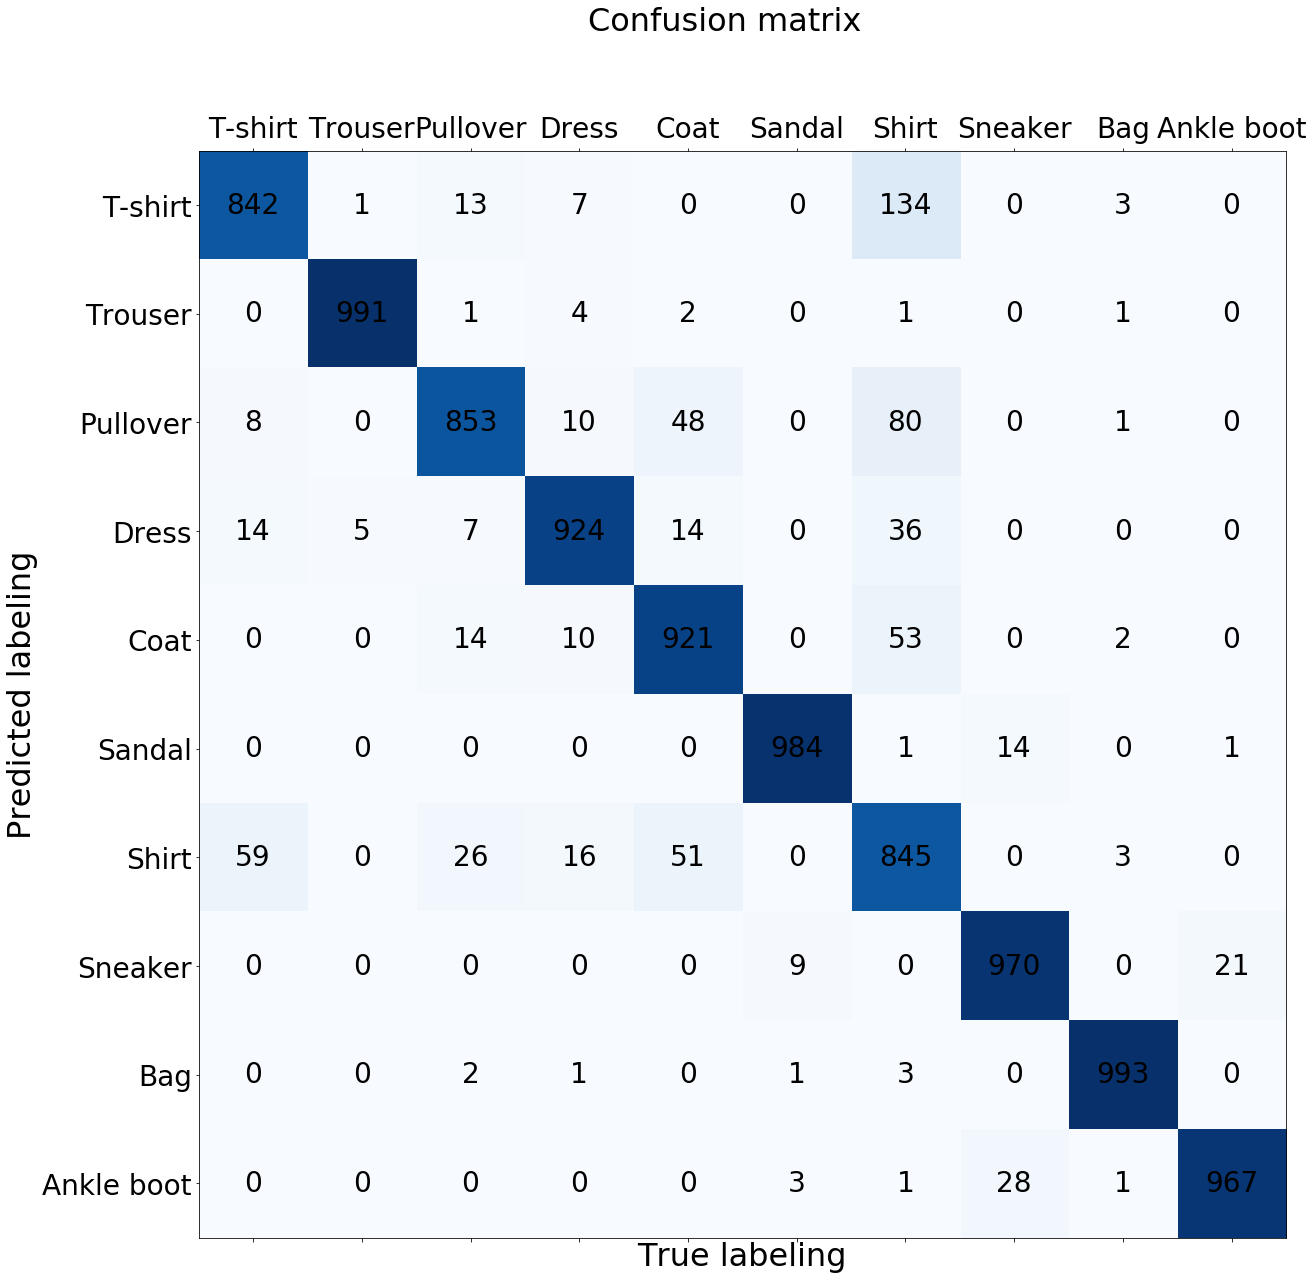

In [67]:
from sklearn.metrics import confusion_matrix

y_vecs = model.predict(x_test)
y_pred = np.argmax(y_vecs, axis=1)
y_true = y_val
cm = confusion_matrix(y_test, y_pred)
# print(cm)

fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(cm, cmap=plt.cm.Blues)
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

for i in range(10):
    for j in range(10):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(10))
plt.yticks(range(10))
plt.suptitle('Confusion matrix',size = 32)
plt.xlabel('True labeling',size = 32)
plt.ylabel('Predicted labeling',size = 32)
plt.rcParams.update({'font.size': 28})

In [68]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
accuracy(cm)

0.929